In [254]:
"""
based on:
https://stackoverflow.com/a/451580/6631639
https://kanoki.org/2017/07/12/merge-images-with-python/
https://stackoverflow.com/a/16377244/6631639
https://stackoverflow.com/a/41887497/6631639

Code by: https://gigabaseorgigabyte.wordpress.com/2017/11/08/resizing-and-combining-multiple-png-images/
"""

import numpy as np
from PIL import Image, ImageFont, ImageDraw
import os

def make_black_white(picture):
    # Get the size of the image
    width, height = picture.size

    # Process every pixel
    for x in range(0,width):
        for y in range(0,height):
            current_color = picture.getpixel((x,y))
            if current_color ==(0,0,0):
                picture.putpixel( (x,y), (255,255,255))

    return picture

def change_height_proportionally(img, width):
    """Change height of image proportional to given width."""
    wpercent = width / img.size[0]
    proportional_height = int(img.size[1] * wpercent)
    return img.resize((width, proportional_height), Image.ANTIALIAS)


def change_width_proportionally(img, height):
    """Change width of image proportional to given height."""
    hpercent = height / img.size[1]
    proportional_width = int(img.size[0] * hpercent)
    return img.resize((proportional_width, height), Image.ANTIALIAS)


def make_same_width(image_list):
    """Make all images in input list the same width."""
    imgs = [i for i in image_list]
    min_width = min([i.size[0] for i in imgs])
    resized = [change_height_proportionally(img, min_width) for img in imgs]
    return [np.asarray(i) for i in resized]


def make_same_height(image_list):
    """Make all images in input list the same height."""
    imgs = [i for i in image_list]
    min_height = min([i.size[1] for i in imgs])
    resized = [change_width_proportionally(img, min_height) for img in imgs]
    return [np.asarray(i) for i in resized]


def add_text(img):
    """Add text annotation to hardcoded locations."""
    font = ImageFont.truetype(
        "/usr/share/fonts/truetype/freefont/FreeMonoBold.ttf",
        size=24,
        encoding="unic")
    draw = ImageDraw.Draw(img)
    draw.text((30, 30), "A", (0, 0, 0), font=font)
    draw.text((30, 490), "B", (0, 0, 0), font=font)
    draw.text((30, 950), "C", (0, 0, 0), font=font)
    draw.text((30, 1430), "D", (0, 0, 0), font=font)
    draw.text((510, 30), "E", (0, 0, 0), font=font)
    draw.text((510, 950), "F", (0, 0, 0), font=font)
    
def add_whitespace_between_horiz(image_list, width):
    whitespace = np.ones([1000,width,3],dtype=np.uint8)*255
    whitespace = Image.fromarray(whitespace)
    for i in range(0, len(image_list)):
        if i==0:
            imgleft = image_list[i]
            continue
        imgright = image_list[i]
        imgrightwhite = Image.fromarray(np.hstack(make_same_height([whitespace, imgright])))
        
        imgleft = Image.fromarray(np.hstack(make_same_height([imgleft,imgrightwhite])))
        imgleft
    return imgleft
    
def add_whitespace_between_vert(image_list, height):
    whitespace = np.ones([height,1000,3],dtype=np.uint8)*255
    whitespace = Image.fromarray(whitespace)
    for i in range(0, len(image_list)):
        if i==0:
            imgtop = image_list[i]
            continue
        imgbottom = image_list[i]
        imgbottomwhite = Image.fromarray(np.vstack(make_same_width([whitespace, imgbottom])))
        
        imgtop = Image.fromarray(np.vstack(make_same_width([imgtop,imgbottomwhite])))
        
    return imgtop

In [182]:
# boxplots
image2 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_10_boxplots_correlations.png').convert('RGB')
image3 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_10_boxplots_rsquared.png').convert('RGB')
boxplots = Image.fromarray(np.hstack(make_same_height([image2, image3])))

whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


# shen268
image0 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanfeatureweight_allperms_50_rowsurfaces_betas_fig.png')
image01 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanfeatureweight_allperms_50_subcortical_betas_fig.png')
colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar.png')

shen268 = Image.fromarray(np.vstack(make_same_width([image0,colorbar,image01])))


# fs86
image0 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanfeatureweight_allperms_50_rowsurfaces_betas_fig.png')
image01 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanfeatureweight_allperms_50_subcortical_betas_fig.png')
colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar.png')

fs86 = Image.fromarray(np.vstack(make_same_width([image0,colorbar,image01])))

bigarray = make_same_width([boxplots, shen268, fs86, whitefiller])

boxplots = bigarray[0]
shen268 = bigarray[1]
fs86 = bigarray[2]
whitespace = bigarray[3]

img =Image.fromarray(np.vstack([whitespace, fs86,whitespace, shen268,whitespace,boxplots]))
fontsize=50
font = ImageFont.truetype("/Library/Fonts/Arial.ttf", fontsize)

draw = ImageDraw.Draw(img)
draw.text((450, 0), "FreeSurfer 86-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((10, 0+50), "A", (255, 255, 255), font=font)

draw.text((460, 620), "Shen 268-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((10, 665), "B", (255, 255, 255), font=font)

draw.text((0, 1250), "C", (0, 0, 0), font=font)
draw.text((690, 1250), "D", (0, 0, 0), font=font)


img.save('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/Analysis1.png')


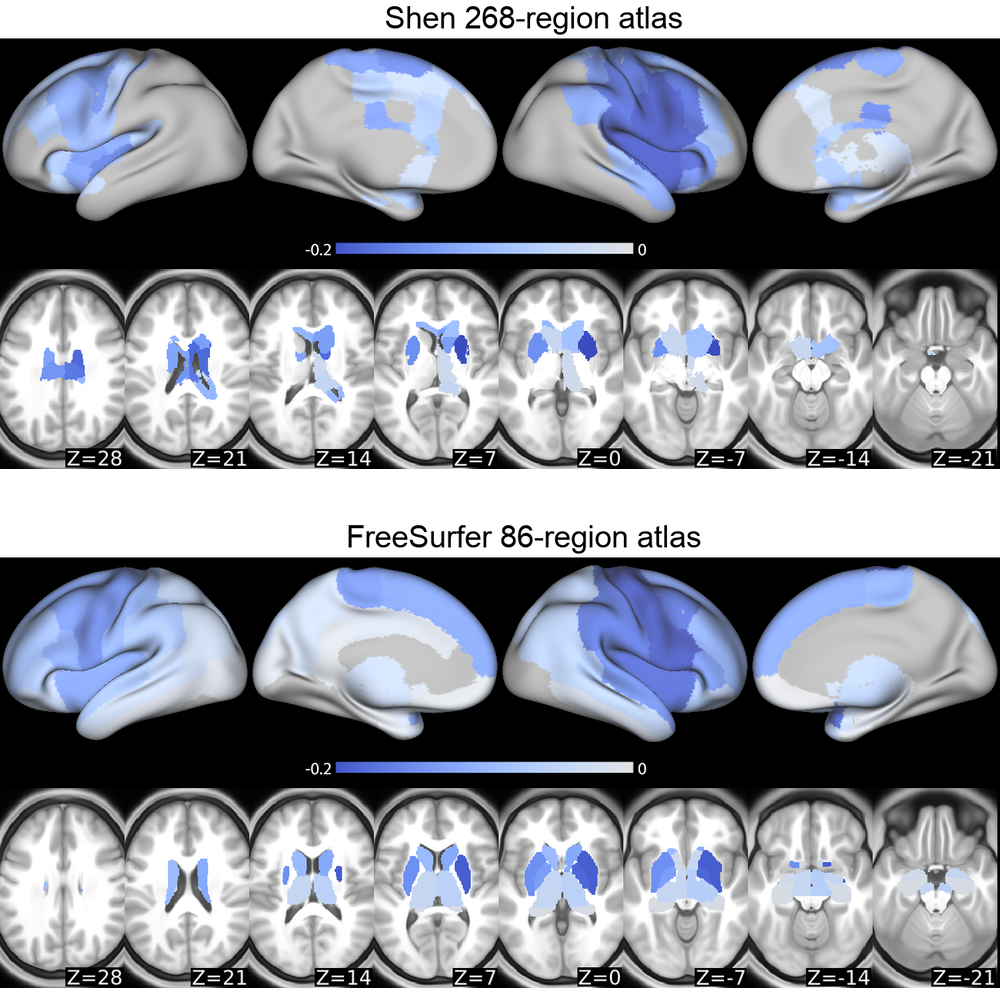

In [255]:
# boxplots
image2 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_10_boxplots_correlations.png').convert('RGB')
image3 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_10_boxplots_rsquared.png').convert('RGB')
boxplots = Image.fromarray(np.hstack(make_same_height([image2, image3])))

whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


# shen268
image0 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanfeatureweight_allperms_50_rowsurfaces_fig.png')
image01 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanfeatureweight_allperms_50_subcortical_fig.png')
colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar.png')

shen268 = Image.fromarray(np.vstack(make_same_width([image0,colorbar,image01])))
shen268 =Image.fromarray(np.vstack((whitefiller, shen268)))
draw = ImageDraw.Draw(shen268)
draw.text((500, 0), "Shen 268-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 40))


#img.save('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/fstxt.png')

# fs86
image0 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanfeatureweight_allperms_50_rowsurfaces_fig.png')
image01 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanfeatureweight_allperms_50_subcortical_fig.png')
colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar.png')

fs86 = Image.fromarray(np.vstack(make_same_width([image0,colorbar,image01])))
fs86 =Image.fromarray(np.vstack((whitefiller, fs86)))
draw = ImageDraw.Draw(fs86)
draw.text((450, 0), "FreeSurfer 86-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 40))

#img.save('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/fstxt.png')


Image.fromarray(np.hstack(make_same_height([shen268, fs86])))

image = add_whitespace_between_vert([shen268, fs86],50)
image


In [123]:

bigarray = make_same_height([boxplots, shen268, fs86, whitefiller])

boxplots = bigarray[0]
shen268 = bigarray[1]
fs86 = bigarray[2]
whitespace = bigarray[3]

img =Image.fromarray(np.vstack([whitespace, fs86,whitespace, shen268,whitespace,boxplots]))
fontsize=50
font = ImageFont.truetype("/Library/Fonts/Arial.ttf", fontsize)

draw = ImageDraw.Draw(img)
draw.text((450, 0), "FreeSurfer 86-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((10, 0+50), "A", (255, 255, 255), font=font)

draw.text((460, 620), "Shen 268-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((10, 665), "B", (255, 255, 255), font=font)

draw.text((0, 1250), "C", (0, 0, 0), font=font)
draw.text((690, 1250), "D", (0, 0, 0), font=font)


img.save('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/Analysis1.png')


(100, 1300, 3)

In [198]:
import seaborn as sns
colors = sns.color_palette('Blues')


tmp =(221/255, 52/255, 50/255)
print(tmp)

(0.8666666666666667, 0.20392156862745098, 0.19607843137254902)


In [ ]:


combined = Image.fromarray(np.hstack(make_same_height(["left.png", "right.png"])))

add_text(combined)

combined.save('Combined_images.png', dpi=combined.size)


[os.remove(f) for f in ["left.png", "right.png"]]
